In [9]:
!pip install tensorflow opencv-python pandas matplotlib scipy


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [13]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [14]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import cv2
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.optimizers import SGD, RMSprop


from keras.models import Model

from os.path import join

In [15]:
data_dir = 'data/train/'

In [16]:
labels = pd.read_csv('data/labels.csv')
labels['id'] = labels['id'].apply(lambda x: x + '.jpg')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


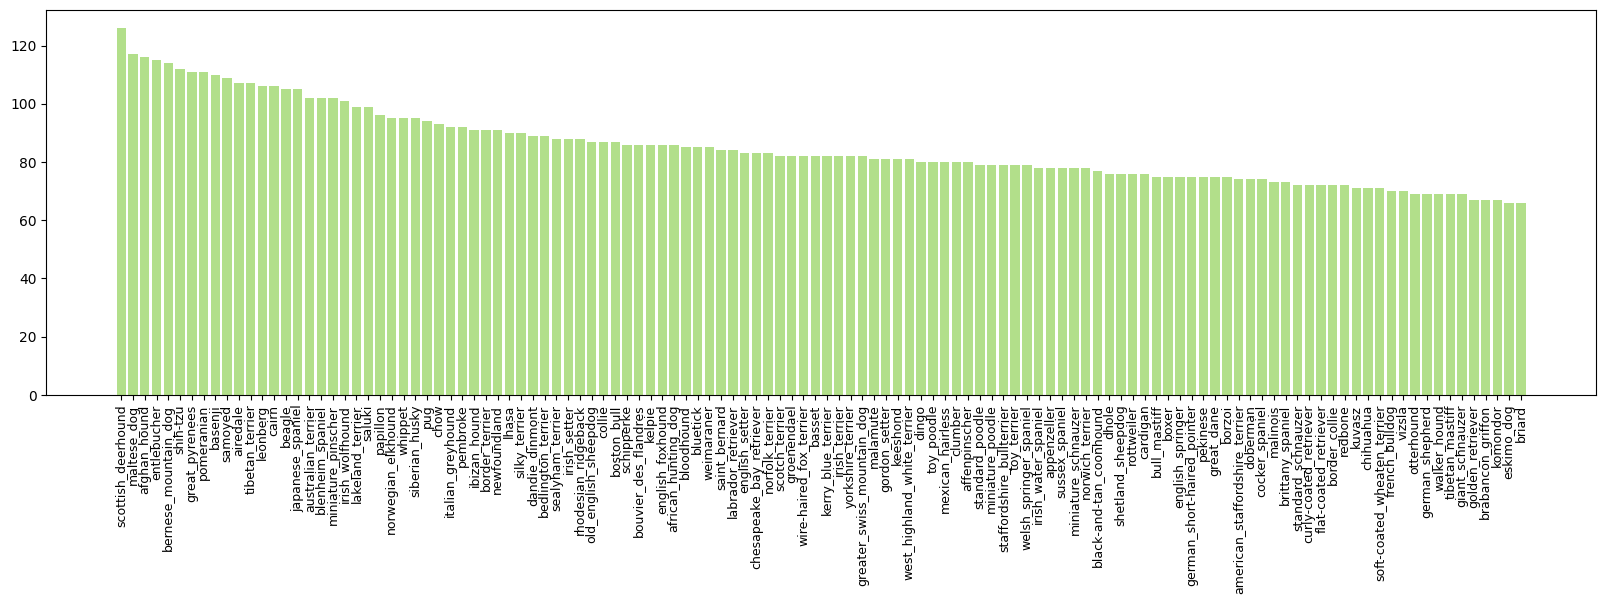

In [17]:
d = labels.breed.value_counts()
plt.figure(figsize=(20,5))
plt.bar(d.index,d.values,color=plt.cm.Paired([2]))
plt.xticks(rotation=90, fontsize=9)
plt.show()

In [18]:
base_model = InceptionV3(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  
predictions = Dense(120, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [19]:
generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                  horizontal_flip = True,
                  validation_split=0.2,
                 )

In [20]:
train_generator = generator.flow_from_dataframe(
    labels, # dataframe
    directory = "data/train/", # images data path / folder in which images are there
    x_col = 'id',
    y_col = 'breed',
    subset="training",
    color_mode="rgb",
    target_size = (299,299),
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42
)
 

Found 8178 validated image filenames belonging to 120 classes.


In [21]:
validation_generator = generator.flow_from_dataframe(
    labels, # dataframe
    directory = "data/train/", # images data path / folder in which images are there
    x_col = 'id',
    y_col = 'breed',
    subset="validation",
    color_mode="rgb",
    target_size = (299,299), 
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 2044 validated image filenames belonging to 120 classes.


In [12]:
!pip install scipy



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import sys
sys.executable
x,y = next(iter(train_generator))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

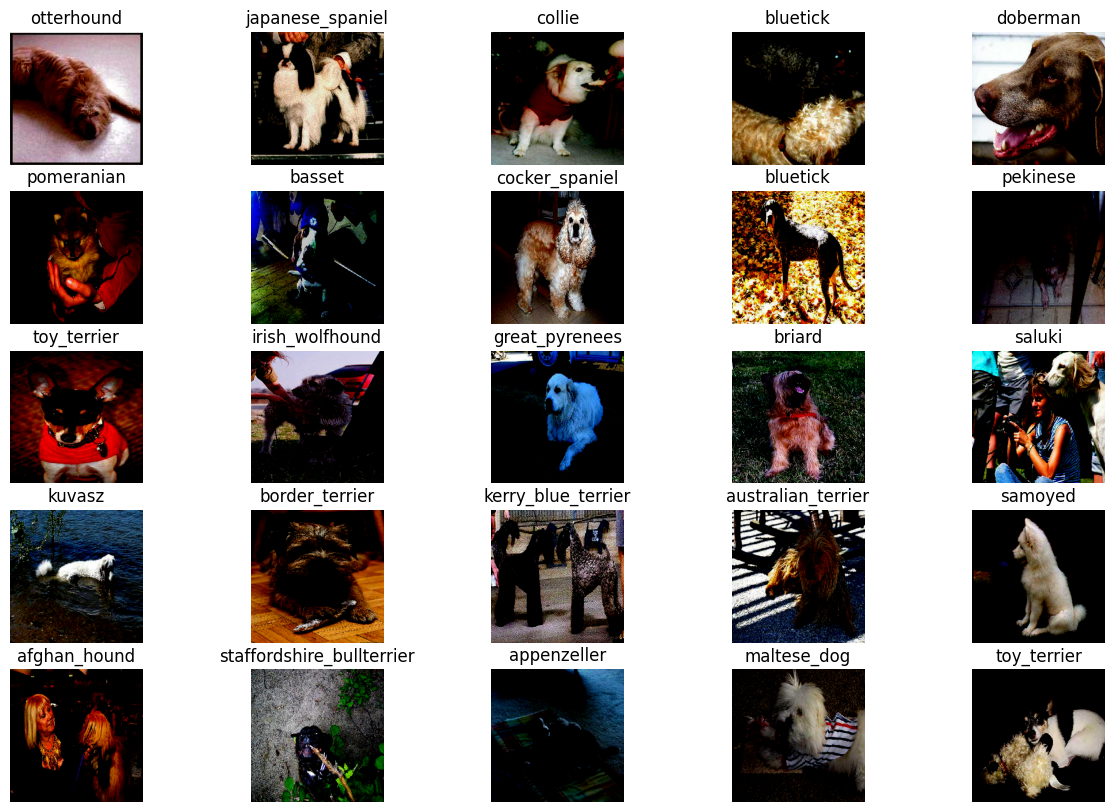

In [23]:
a = train_generator.class_indices
class_names = list(a.keys())  # storing class/breed names in a list
 
def plot_images(img, labels):
    plt.figure(figsize=[15, 10])
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
 
plot_images(x,y)

In [24]:
batch_size=32
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

keras_callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,verbose=1,
                                          min_delta=0.001,
                                          restore_best_weights=True), ModelCheckpoint(filepath='mybestmodel.h5', monitor='val_loss', save_best_only=True, mode='min')]
# fit model
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20,
                    callbacks=keras_callbacks)

Epoch 1/20
255/255 [==============================] - 381s 1s/step - loss: 1.2790 - accuracy: 0.6970 - val_loss: 0.4539 - val_accuracy: 0.8571
Epoch 2/20


/Users/dhruvkaul/Desktop/DeepLearning/DogBreedClassifier/dogbreedclassifier/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


255/255 [==============================] - 374s 1s/step - loss: 0.5246 - accuracy: 0.8452 - val_loss: 0.4394 - val_accuracy: 0.8631
Epoch 3/20
255/255 [==============================] - 375s 1s/step - loss: 0.4195 - accuracy: 0.8686 - val_loss: 0.4329 - val_accuracy: 0.8690
Epoch 4/20
255/255 [==============================] - 401s 2s/step - loss: 0.3960 - accuracy: 0.8740 - val_loss: 0.3896 - val_accuracy: 0.8849
Epoch 5/20
255/255 [==============================] - 406s 2s/step - loss: 0.3643 - accuracy: 0.8837 - val_loss: 0.4669 - val_accuracy: 0.8576
Epoch 6/20
255/255 [==============================] - 400s 2s/step - loss: 0.3374 - accuracy: 0.8938 - val_loss: 0.4406 - val_accuracy: 0.8666
Epoch 7/20
255/255 [==============================] - 403s 2s/step - loss: 0.3299 - accuracy: 0.8916 - val_loss: 0.4338 - val_accuracy: 0.8745
Epoch 8/20
255/255 [==============================] - 402s 2s/step - loss: 0.2930 - accuracy: 0.9044 - val_loss: 0.4439 - val_accuracy: 0.8730
Epoch 9/20

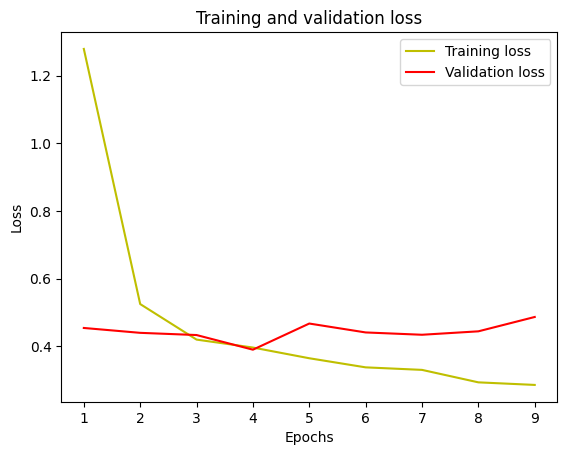

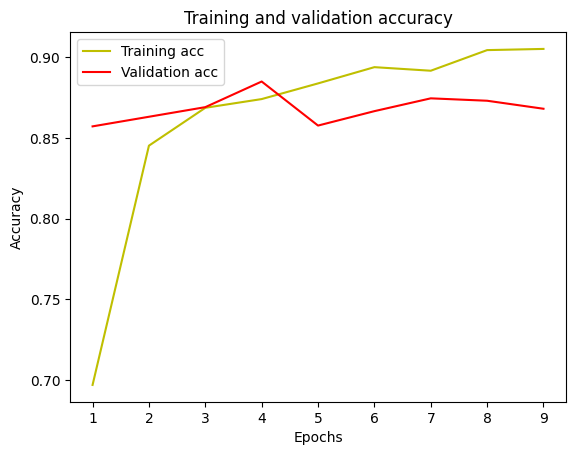

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)

64/64 [==============================] - 76s 1s/step - loss: 0.3914 - accuracy: 0.8821
[0.3914203345775604, 0.8820939064025879]


In [126]:
model.save("final_model.h5")

In [129]:
breed_to_num = dict(zip(classes, range(120)))
breed_to_num


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

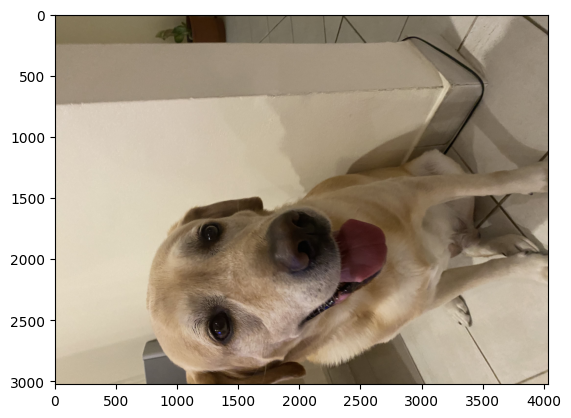

1/1 [==============================] - 0s 108ms/step
Confidence Level:  0.24457964301109314
Predicted label: labrador_retriever


In [145]:
import random
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil
import csv 

path = "data/train/"
fileList=os.listdir(path)

img = plt.imread("IMG_5222_2.jpg")#using my labrador Rusty as a test
plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (299, 299))
img = tf.reshape(img, (-1, 299, 299, 3))
prediction = model.predict(img/255)

classes = sorted(list(set(labels['breed'])))


print(f"Confidence Level:  {np.max(prediction[0])}")
print(f"Predicted label: {classes[np.argmax(prediction[0])]}")





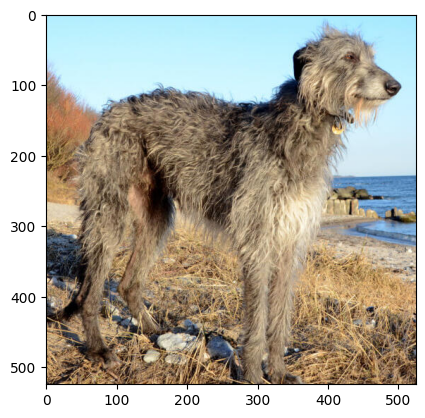

1/1 [==============================] - 0s 81ms/step
Confidence Level:  0.9806073904037476
Predicted label: scottish_deerhound


In [134]:
img = plt.imread("Deerhound1.jpg")
plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (299, 299))
img = tf.reshape(img, (-1, 299, 299, 3))
prediction = model.predict(img/255)

classes = sorted(list(set(labels['breed'])))



print(f"Confidence Level:  {np.max(prediction[0])}")
print(f"Predicted label: {classes[np.argmax(prediction[0])]}")


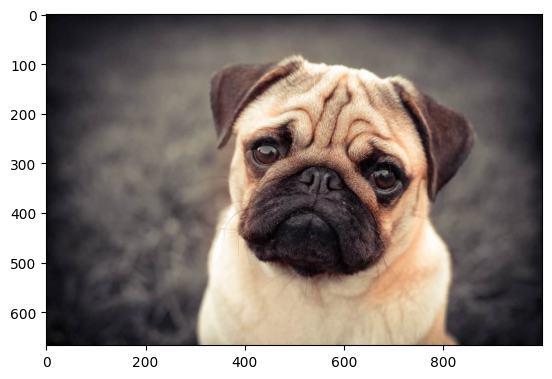

1/1 [==============================] - 0s 93ms/step
Confidence Level:  0.9699839949607849
Predicted label: pug


In [133]:
img = plt.imread("pug.jpeg")
plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (299, 299))
img = tf.reshape(img, (-1, 299, 299, 3))
prediction = model.predict(img/255)

classes = sorted(list(set(labels['breed'])))



print(f"Confidence Level:  {np.max(prediction[0])}")
print(f"Predicted label: {classes[np.argmax(prediction[0])]}")


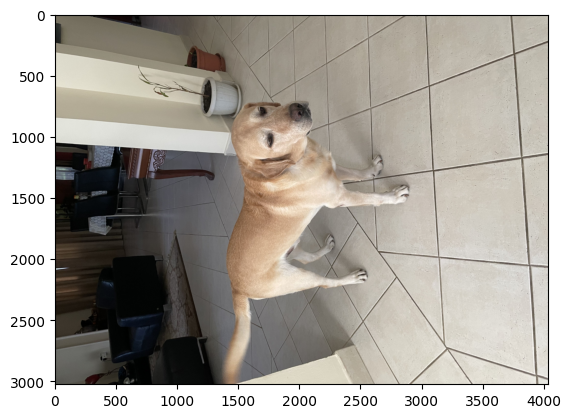

1/1 [==============================] - 0s 57ms/step
Confidence Level:  0.42669278383255005
Predicted label: pug


In [139]:
img = plt.imread("IMG_5312.jpg")
plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (299, 299))
img = tf.reshape(img, (-1, 299, 299, 3))
prediction = model.predict(img/255)

classes = sorted(list(set(labels['breed'])))



print(f"Confidence Level:  {np.max(prediction[0])}")
print(f"Predicted label: {classes[np.argmax(prediction[0])]}")

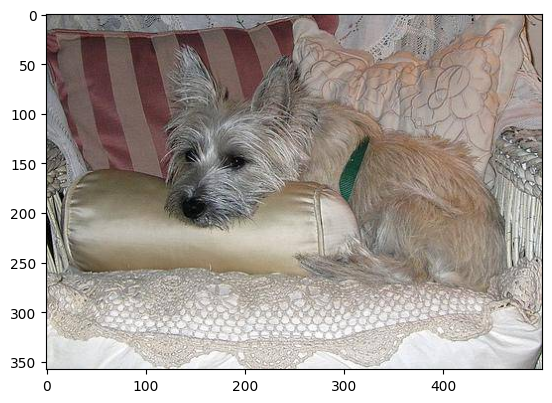

1/1 [==============================] - 0s 91ms/step
Confidence Level:  0.9991676807403564
Predicted label: cairn


In [141]:

img = plt.imread("0a0f82d4557f70718efa26f8a8a7773f.jpg")#using image from test folder
plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (299, 299))
img = tf.reshape(img, (-1, 299, 299, 3))
prediction = model.predict(img/255)

classes = sorted(list(set(labels['breed'])))



print(f"Confidence Level:  {np.max(prediction[0])}")
print(f"Predicted label: {classes[np.argmax(prediction[0])]}")

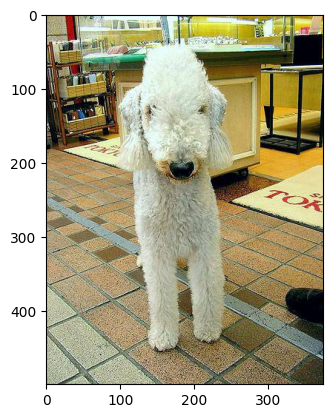

1/1 [==============================] - 0s 93ms/step
Confidence Level:  0.999555766582489
Predicted label: bedlington_terrier


In [144]:

img = plt.imread("0a3f1f6f5f0ede7ea6e27427994d5f62.jpg")#using image from test folder
plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (299, 299))
img = tf.reshape(img, (-1, 299, 299, 3))
prediction = model.predict(img/255)

classes = sorted(list(set(labels['breed'])))



print(f"Confidence Level:  {np.max(prediction[0])}")
print(f"Predicted label: {classes[np.argmax(prediction[0])]}")